### **Advanced Stock Pattern Prediction using LSTM with the Attention Mechanism in TensorFlow: Apple Inc. (AAPL) Data**




#**Section 1: Understanding LSTM and Attention in Financial Modelling**
#**The Basics of LSTM Networks**
LSTM networks are a type of Recurrent Neural Network (RNN) specially designed to remember and process sequences of data over long periods. What sets LSTMs apart from traditional RNNs is their ability to preserve information for long durations, courtesy of their unique structure comprising three gates: the input, forget, and output gates. These gates collaboratively manage the flow of information, deciding what to retain and what to discard, thereby mitigating the issue of vanishing gradients — a common problem in standard RNNs.

In the context of financial markets, this capability to remember and utilize long-term dependencies is invaluable. Stock prices, for instance, aren’t just influenced by recent trends but also by patterns established over time. LSTM networks adeptly capture these temporal dependencies, making them ideal for financial time series analysis.

# **Attention Mechanism: Enhancing LSTM**
The attention mechanism, initially popularized in the field of natural language processing, has found its way into various other domains, including finance. It operates on a simple yet profound concept: not all parts of the input sequence are equally important. By allowing the model to focus on specific parts of the input sequence while ignoring others, the attention mechanism enhances the model’s context understanding capabilities.

Incorporating attention into LSTM networks results in a more focused and context-aware model. When predicting stock prices, certain historical data points may be more relevant than others. The attention mechanism empowers the LSTM to weigh these points more heavily, leading to more accurate and nuanced predictions.

# **The Relevance in Financial Pattern Prediction**
The amalgamation of LSTM with attention mechanisms creates a robust model for financial pattern prediction. The financial market is a complex adaptive system, influenced by a multitude of factors and exhibiting non-linear characteristics. Traditional models often fall short in capturing this complexity. However, LSTM networks, especially when combined with an attention mechanism, are adept at unraveling these patterns, offering a deeper understanding and more accurate forecasts of future stock movements.

As we proceed to build and implement an LSTM with an attention mechanism to predict the next four candles of AAPL’s stock, we delve into a sophisticated realm of financial analysis, one that holds the promise of revolutionizing how we interpret and respond to the ever-changing dynamics of the stock market.



# **Section 2: Setting Up Your Environment**

In [1]:
!pip install tensorflow -qqq

In [2]:
!pip install keras -qqq

In [3]:
!pip install yfinance -qqq

In [3]:
import tensorflow as tf
import keras
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Check TensorFlow version
print("TensorFlow Version: ", tf.__version__)

TensorFlow Version:  2.15.0


**Data Acquisition from yfinance**

**Fetching Historical Data**

To analyze AAPL stock patterns, we need historical stock price data. Here’s where yfinance comes into play. This library is designed to fetch historical market data from Yahoo Finance.

This script fetches the daily stock prices of Apple Inc. from January 1, 2020, to January 1, 2024.

In [5]:
# Fetch AAPL data
aapl_data = yf.download('AAPL', start='2020-01-01', end='2024-01-01')

[*********************100%%**********************]  1 of 1 completed


In [6]:
# Display the first few rows of the dataframe
aapl_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,72.960464,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.251129,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.826836,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.484344,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.650337,132079200


# **Section 3: Data Preprocessing and Preparation**

In [7]:
# Checking for missing values
aapl_data.isnull().sum()


Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
aapl_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,72.960464,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.251129,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.826836,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.484344,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.650337,132079200
...,...,...,...,...,...,...
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.091385,37122800
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.542831,28919300
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.642548,48087700


In [9]:
# Filling missing values, if any
aapl_data.fillna(method='ffill', inplace=True)

In [10]:
aapl_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,72.960464,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.251129,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.826836,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.484344,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.650337,132079200
...,...,...,...,...,...,...
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.091385,37122800
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.542831,28919300
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.642548,48087700


Feature Selection
In stock market data, various features can be influential. Typically, ‘Open’, ‘High’, ‘Low’, ‘Close’, and ‘Volume’ are used.

Deciding Features: For our model, we’ll use ‘Close’ prices, but you can experiment with additional features like ‘Open’, ‘High’, ‘Low’, and ‘Volume’.

# **Normalization**
Normalization is a technique used to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values.

# **Applying Min-Max Scaling:**
This scales the dataset so that all the input features lie between 0 and 1.

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
aapl_data_scaled = scaler.fit_transform(aapl_data['Close'].values.reshape(-1,1))

In [12]:
aapl_data_scaled

array([[0.13375114],
       [0.1286109 ],
       [0.13278292],
       ...,
       [0.96507468],
       [0.96810253],
       [0.96070906]])

# **Creating Sequences**
LSTM models require input to be in a sequence format. We transform the data into sequences for the model to learn from.

**Defining Sequence Length:** Choose a sequence length (like 60 days). This means, for every sample, the model will look at the last 60 days of data to make a prediction.

In [13]:
X = []
y = []

for i in range(60, len(aapl_data_scaled)):
    X.append(aapl_data_scaled[i-60:i, 0])
    y.append(aapl_data_scaled[i, 0])

In [14]:
X

[array([0.13375114, 0.1286109 , 0.13278292, 0.13030088, 0.13875052,
        0.15008715, 0.15131936, 0.16299047, 0.15545619, 0.15309733,
        0.15996267, 0.16610632, 0.16230396, 0.16429316, 0.16698649,
        0.16536695, 0.14889013, 0.16427554, 0.17598183, 0.17515447,
        0.14987592, 0.14837961, 0.16631755, 0.17089446, 0.17751333,
        0.16839474, 0.17107045, 0.16765538, 0.18101645, 0.17691481,
        0.17705567, 0.16658159, 0.17471438, 0.16887002, 0.15610751,
        0.12993116, 0.11215165, 0.12019645, 0.08652102, 0.08623935,
        0.13104019, 0.11433452, 0.13795834, 0.12067178, 0.11382401,
        0.07358251, 0.10732832, 0.08988328, 0.04200187, 0.09435458,
        0.0314046 , 0.05015228, 0.03925573, 0.03592868, 0.00857291,
        0.        , 0.03962541, 0.03723134, 0.05997502, 0.04113931]),
 array([0.1286109 , 0.13278292, 0.13030088, 0.13875052, 0.15008715,
        0.15131936, 0.16299047, 0.15545619, 0.15309733, 0.15996267,
        0.16610632, 0.16230396, 0.16429316, 0.

In [15]:
y

[0.05358494912411915,
 0.05266956146809709,
 0.02911614472101831,
 0.03619271796347345,
 0.02999631792775942,
 0.06706920909797398,
 0.061717740958965484,
 0.07340646693081176,
 0.07678630196065245,
 0.08604574128645182,
 0.11033850030390258,
 0.10572640129602062,
 0.1097048013813734,
 0.10285702804660318,
 0.09252380319490411,
 0.07745524219321714,
 0.09106273930917791,
 0.08917915575358976,
 0.10315631057435926,
 0.10350840134565936,
 0.09542836403284793,
 0.11153557669341752,
 0.12222083859490751,
 0.11389443444090253,
 0.12109424482546371,
 0.12883975830048355,
 0.13424403468303614,
 0.1397186862426414,
 0.15096732561111714,
 0.15955782470435176,
 0.15322056687151397,
 0.14660164716593793,
 0.14992872767374366,
 0.1467072636530261,
 0.1594697751507721,
 0.15626598550658144,
 0.16698648871810706,
 0.16279685565857793,
 0.16638797738410416,
 0.16258562268440147,
 0.16501485560893925,
 0.16526132989315112,
 0.16471562680269236,
 0.1715985877259889,
 0.17422148669119453,
 0.17735490115

# **Train-Test Split**

Split the data into training and testing sets to evaluate the model’s performance properly.

Defining Split Ratio: Typically, 80% of data is used for training and 20% for testing.

In [16]:
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size

X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [17]:
X_train

[array([0.13375114, 0.1286109 , 0.13278292, 0.13030088, 0.13875052,
        0.15008715, 0.15131936, 0.16299047, 0.15545619, 0.15309733,
        0.15996267, 0.16610632, 0.16230396, 0.16429316, 0.16698649,
        0.16536695, 0.14889013, 0.16427554, 0.17598183, 0.17515447,
        0.14987592, 0.14837961, 0.16631755, 0.17089446, 0.17751333,
        0.16839474, 0.17107045, 0.16765538, 0.18101645, 0.17691481,
        0.17705567, 0.16658159, 0.17471438, 0.16887002, 0.15610751,
        0.12993116, 0.11215165, 0.12019645, 0.08652102, 0.08623935,
        0.13104019, 0.11433452, 0.13795834, 0.12067178, 0.11382401,
        0.07358251, 0.10732832, 0.08988328, 0.04200187, 0.09435458,
        0.0314046 , 0.05015228, 0.03925573, 0.03592868, 0.00857291,
        0.        , 0.03962541, 0.03723134, 0.05997502, 0.04113931]),
 array([0.1286109 , 0.13278292, 0.13030088, 0.13875052, 0.15008715,
        0.15131936, 0.16299047, 0.15545619, 0.15309733, 0.15996267,
        0.16610632, 0.16230396, 0.16429316, 0.

# **Reshaping Data for LSTM**

Finally, we need to reshape our data into a 3D format [samples, time steps, features] required by LSTM layers.

Reshaping the Data:

In [18]:
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# **Section 4: Building the LSTM with Attention Model**

**Creating LSTM Layers**

Our LSTM model will consist of several layers, including LSTM layers for processing the time-series data. The basic structure is as follows:

In [19]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, AdditiveAttention, Permute, Reshape, Multiply

model = Sequential()

# Adding LSTM layers with return_sequences=True
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=True))

In [20]:
model

# **Integrating the Attention Mechanism**

The attention mechanism can be added to enhance the model’s ability to focus on relevant time steps:

In [21]:
# Adding self-attention mechanism
# The attention mechanism
attention = AdditiveAttention(name='attention_weight')
# Permute and reshape for compatibility
model.add(Permute((2, 1)))
model.add(Reshape((-1, X_train.shape[1])))
attention_result = attention([model.output, model.output])
multiply_layer = Multiply()([model.output, attention_result])
# Return to original shape
model.add(Permute((2, 1)))
model.add(Reshape((-1, 50)))

# Adding a Flatten layer before the final Dense layer
model.add(tf.keras.layers.Flatten())

# Final Dense layer
model.add(Dense(1))

# Compile the model
# model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
# history = model.fit(X_train, y_train, epochs=100, batch_size=25, validation_split=0.2)

# **Optimizing the Model**

To enhance the model’s performance and reduce the risk of overfitting, we include Dropout and Batch Normalization.

Dropout helps in preventing overfitting by randomly setting a fraction of the input units to 0 at each update during training, and Batch Normalization stabilizes the learning process.

In [22]:
from keras.layers import BatchNormalization

# Adding Dropout and Batch Normalization
model.add(Dropout(0.2))
model.add(BatchNormalization())

# **Model Compilation**

Finally, we compile the model with an optimizer and loss function suited for our regression task.
adam optimizer is generally a good choice for recurrent neural networks, and mean squared error works well as a loss function for regression tasks like ours.


In [23]:
model.compile(optimizer='adam', loss='mean_squared_error')

# **Model Summary**

It’s beneficial to view the summary of the model to understand its structure and number of parameters.

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 permute (Permute)           (None, 50, 60)            0         
                                                                 
 reshape (Reshape)           (None, 50, 60)            0         
                                                                 
 permute_1 (Permute)         (None, 60, 50)            0         
                                                                 
 reshape_1 (Reshape)         (None, 60, 50)            0         
                                                                 
 flatten (Flatten)           (None, 3000)             

# **Section 5: Training the Model**

Now that our LSTM model with attention is built, it’s time to train it using our prepared training set. This process involves feeding the training data to the model and letting it learn to make predictions.

**Training Code**

Use the following code to train your model with X_train and y_train:

In [26]:
# Assuming X_train and y_train are already defined and preprocessed
history = model.fit(X_train, y_train, epochs=100, batch_size=25, validation_split=0.2)

Epoch 1/100
25/25 [==============================] - 8s 58ms/step - loss: 0.7577 - val_loss: 0.3586
Epoch 2/100
25/25 [==============================] - 0s 16ms/step - loss: 0.2938 - val_loss: 0.3648
Epoch 3/100
25/25 [==============================] - 0s 16ms/step - loss: 0.2489 - val_loss: 0.3304
Epoch 4/100
25/25 [==============================] - 0s 16ms/step - loss: 0.2247 - val_loss: 0.3041
Epoch 5/100
25/25 [==============================] - 0s 17ms/step - loss: 0.2018 - val_loss: 0.2788
Epoch 6/100
25/25 [==============================] - 0s 17ms/step - loss: 0.1821 - val_loss: 0.2584
Epoch 7/100
25/25 [==============================] - 0s 16ms/step - loss: 0.1670 - val_loss: 0.2257
Epoch 8/100
25/25 [==============================] - 0s 11ms/step - loss: 0.1529 - val_loss: 0.2059
Epoch 9/100
25/25 [==============================] - 0s 12ms/step - loss: 0.1375 - val_loss: 0.1819
Epoch 10/100
25/25 [==============================] - 0s 11ms/step - loss: 0.1211 - val_loss: 0.1790

**Overfitting and How to Avoid It**

Overfitting occurs when a model learns patterns specific to the training data, which do not generalize to new data. Here are ways to avoid overfitting:

**Validation Set:** Using a validation set (as we did in the training code) helps in monitoring the model’s performance on unseen data.

**Early Stopping:** This technique stops training when the model’s performance on the validation set starts to degrade. Implementing early stopping in Keras is straightforward:

In [27]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(X_train, y_train, epochs=100, batch_size=25, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/100
25/25 [==============================] - 0s 16ms/step - loss: 0.0094 - val_loss: 0.0019
Epoch 2/100
25/25 [==============================] - 0s 12ms/step - loss: 0.0107 - val_loss: 0.0051
Epoch 3/100
25/25 [==============================] - 0s 12ms/step - loss: 0.0115 - val_loss: 0.0206
Epoch 4/100
25/25 [==============================] - 0s 12ms/step - loss: 0.0115 - val_loss: 0.0036
Epoch 5/100
25/25 [==============================] - 0s 11ms/step - loss: 0.0085 - val_loss: 0.0015
Epoch 6/100
25/25 [==============================] - 0s 13ms/step - loss: 0.0107 - val_loss: 0.0070
Epoch 7/100
25/25 [==============================] - 0s 17ms/step - loss: 0.0098 - val_loss: 9.3690e-04
Epoch 8/100
25/25 [==============================] - 0s 17ms/step - loss: 0.0089 - val_loss: 0.0017
Epoch 9/100
25/25 [==============================] - 0s 16ms/step - loss: 0.0099 - val_loss: 0.0026
Epoch 10/100
25/25 [==============================] - 0s 17ms/step - loss: 0.0128 - val_loss: 8.

Here, patience=10 means training will stop if the validation loss does not improve for 10 consecutive epochs.

Regularization Techniques: Techniques like Dropout and Batch Normalization, which are already included in our model, also help in reducing overfitting.

Optional: These are more callbacks

In [28]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, TensorBoard, CSVLogger

# Callback to save the model periodically
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss')

# Callback to reduce learning rate when a metric has stopped improving
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5)

# Callback for TensorBoard
tensorboard = TensorBoard(log_dir='./logs')

# Callback to log details to a CSV file
csv_logger = CSVLogger('training_log.csv')

# Combining all callbacks
callbacks_list = [early_stopping, model_checkpoint, reduce_lr, tensorboard, csv_logger]

# Fit the model with the callbacks
history = model.fit(X_train, y_train, epochs=100, batch_size=25, validation_split=0.2, callbacks=callbacks_list)

Epoch 1/100
25/25 [==============================] - 1s 18ms/step - loss: 0.0111 - val_loss: 0.0018 - lr: 0.0010
Epoch 2/100
13/25 [==============>...............] - ETA: 0s - loss: 0.0113

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


25/25 [==============================] - 0s 12ms/step - loss: 0.0100 - val_loss: 0.0156 - lr: 0.0010
Epoch 3/100
25/25 [==============================] - 0s 13ms/step - loss: 0.0105 - val_loss: 8.9210e-04 - lr: 0.0010
Epoch 4/100
25/25 [==============================] - 0s 14ms/step - loss: 0.0105 - val_loss: 0.0012 - lr: 0.0010
Epoch 5/100
25/25 [==============================] - 0s 13ms/step - loss: 0.0100 - val_loss: 0.0046 - lr: 0.0010
Epoch 6/100
25/25 [==============================] - 0s 13ms/step - loss: 0.0091 - val_loss: 0.0020 - lr: 0.0010
Epoch 7/100
25/25 [==============================] - 0s 11ms/step - loss: 0.0105 - val_loss: 0.0183 - lr: 0.0010
Epoch 8/100
25/25 [==============================] - 0s 11ms/step - loss: 0.0094 - val_loss: 0.0016 - lr: 0.0010
Epoch 9/100
25/25 [==============================] - 0s 13ms/step - loss: 0.0091 - val_loss: 0.0010 - lr: 1.0000e-04
Epoch 10/100
25/25 [==============================] - 0s 11ms/step - loss: 0.0096 - val_loss: 0.0011

# **Section 6: Evaluating Model Performance**

After training the model, the next step is to evaluate its performance using the test set. This will give us an understanding of how well our model can generalize to new, unseen data.

**Evaluating with the Test Set**

To evaluate the model, we first need to prepare our test data (X_test) in the same way we did for the training data. Then, we can use the model's evaluate function:

In [29]:
# Convert X_test and y_test to Numpy arrays if they are not already
X_test = np.array(X_test)
y_test = np.array(y_test)

# Ensure X_test is reshaped similarly to how X_train was reshaped
# This depends on how you preprocessed the training data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Now evaluate the model on the test data
test_loss = model.evaluate(X_test, y_test)
print("Test Loss: ", test_loss)

6/6 [==============================] - 0s 6ms/step - loss: 0.0068
Test Loss:  0.006828922778367996


# **Performance Metrics**

In addition to the loss, other metrics can provide more insights into the model’s performance. For regression tasks like ours, common metrics include:

**Mean Absolute Error (MAE):** This measures the average magnitude of the errors in a set of predictions, without considering their direction.

**Root Mean Square Error (RMSE):** This is the square root of the average of squared differences between prediction and actual observation.

To calculate these metrics, we can make predictions using our model and compare them with the actual values:

In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Making predictions
y_pred = model.predict(X_test)

# Calculating MAE and RMSE
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("Mean Absolute Error: ", mae)
print("Root Mean Square Error: ", rmse)

6/6 [==============================] - 1s 7ms/step
Mean Absolute Error:  0.07877187290794214
Root Mean Square Error:  0.0826373013265096


# **Section 7: Predicting the Next 4 Candles**

Having trained and evaluated our LSTM model with an attention mechanism, the final step is to utilize it for predicting the next 4 candles (days) of AAPL stock prices.

**Making Predictions**

To predict future stock prices, we need to provide the model with the most recent data points. Let’s assume we have the latest 60 days of data prepared in the same format as X_train: and we want to predict the price for the next day:

In [35]:
import yfinance as yf
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Fetching the latest 60 days of AAPL stock data
data = yf.download('AAPL', period='3mo', interval='1d')

# Selecting the 'Close' price and converting to numpy array
closing_prices = data['Close'].values

# Scaling the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(closing_prices.reshape(-1,1))

# Since we need the last 60 days to predict the next day, we reshape the data accordingly
X_latest = np.array([scaled_data[-60:].reshape(60)])

# Reshaping the data for the model (adding batch dimension)
X_latest = np.reshape(X_latest, (X_latest.shape[0], X_latest.shape[1], 1))

# Making predictions for the next 4 candles
predicted_stock_price = model.predict(X_latest)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

print("Predicted Stock Prices for the next 4 days: ", predicted_stock_price)

[*********************100%%**********************]  1 of 1 completed


1/1 [==============================] - 0s 53ms/step
Predicted Stock Prices for the next 4 days:  [[195.80925]]


Let’s predict the price for the next 4 days:

In [37]:
import yfinance as yf
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Fetch the latest 60 days of AAPL stock data
data = yf.download('AAPL', period='3mo', interval='1d')

# Select 'Close' price and scale it
closing_prices = data['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(closing_prices)

# Predict the next 4 days iteratively
predicted_prices = []
current_batch = scaled_data[-60:].reshape(1, 60, 1)  # Most recent 60 days

for i in range(4):  # Predicting 4 days
    # Get the prediction (next day)
    next_prediction = model.predict(current_batch)

    # Reshape the prediction to fit the batch dimension
    next_prediction_reshaped = next_prediction.reshape(1, 1, 1)

    # Append the prediction to the batch used for predicting
    current_batch = np.append(current_batch[:, 1:, :], next_prediction_reshaped, axis=1)

    # Inverse transform the prediction to the original price scale
    predicted_prices.append(scaler.inverse_transform(next_prediction)[0, 0])

print("Predicted Stock Prices for the next 4 days: ", predicted_prices)

[*********************100%%**********************]  1 of 1 completed

1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step
Predicted Stock Prices for the next 4 days:  [195.80925, 197.08809, 197.23776, 196.69135]


# **Visualization of Predictions**

Comparing the predicted values with actual stock prices visually can be very insightful. Below is the code to plot the predicted stock prices against the actual data:

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 920.4 kB/s eta 0:00:00


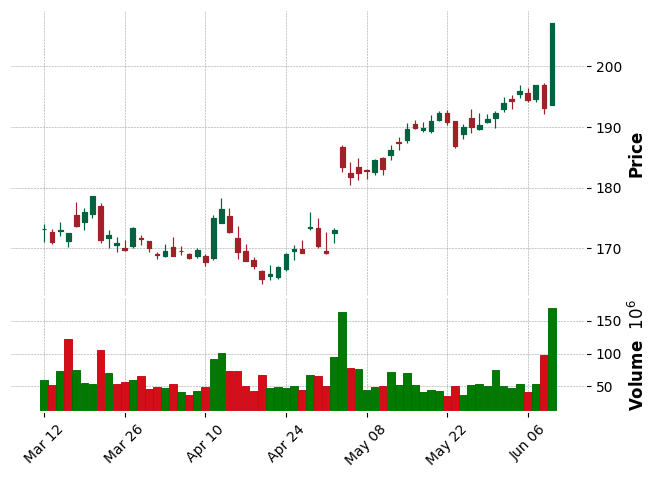

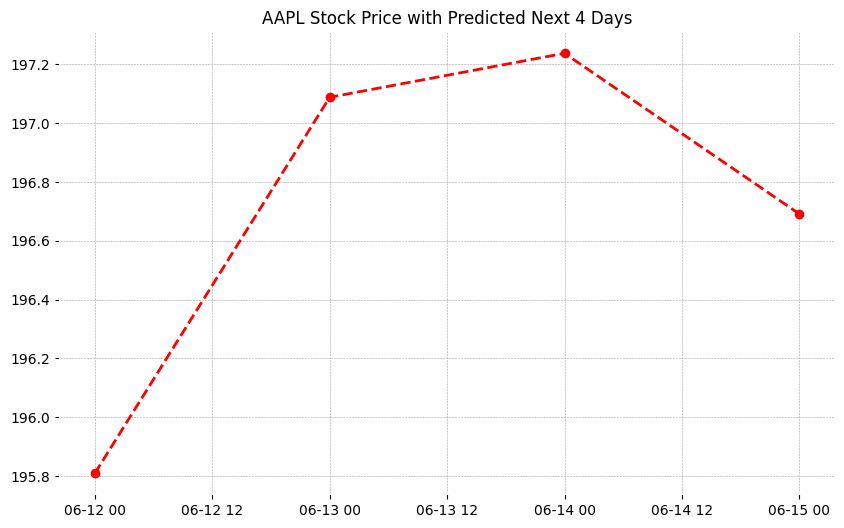

In [38]:
!pip install mplfinance -qqq
import pandas as pd
import mplfinance as mpf
import matplotlib.dates as mpl_dates
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame with the fetched AAPL stock data
# Make sure it contains Open, High, Low, Close, and Volume columns

# Creating a list of dates for the predictions
last_date = data.index[-1]
next_day = last_date + pd.Timedelta(days=1)
prediction_dates = pd.date_range(start=next_day, periods=4)

# Assuming 'predicted_prices' is your list of predicted prices for the next 4 days
predictions_df = pd.DataFrame(index=prediction_dates, data=predicted_prices, columns=['Close'])

# Plotting the actual data with mplfinance
mpf.plot(data, type='candle', style='charles', volume=True)

# Overlaying the predicted data
plt.figure(figsize=(10,6))
plt.plot(predictions_df.index, predictions_df['Close'], linestyle='dashed', marker='o', color='red')

plt.title("AAPL Stock Price with Predicted Next 4 Days")
plt.show()

# **Final Visual for Predictions:**

[*********************100%%**********************]  1 of 1 completed

1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 21ms/step


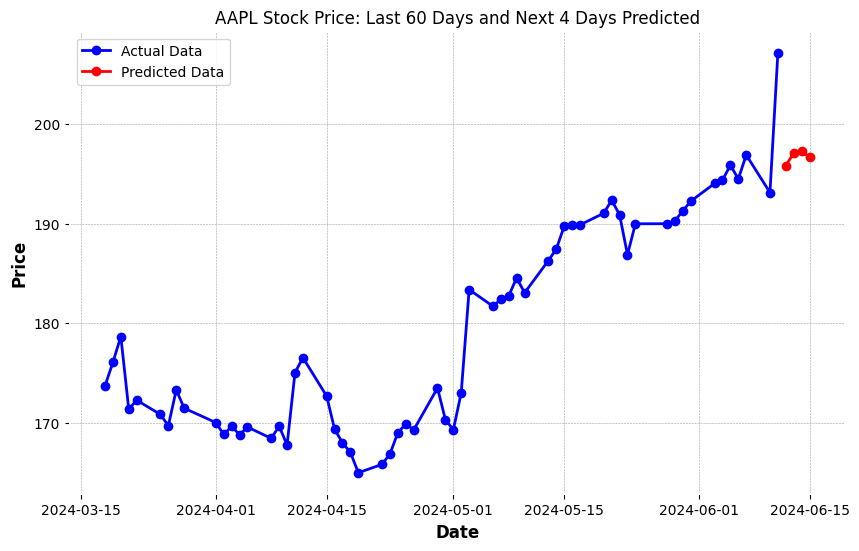

In [40]:
import pandas as pd
import mplfinance as mpf
import matplotlib.dates as mpl_dates
import matplotlib.pyplot as plt

# Fetch the latest 60 days of AAPL stock data
data = yf.download('AAPL', period='3mo', interval='1d') # Fetch 64 days to display last 60 days in the chart

# Select 'Close' price and scale it
closing_prices = data['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(closing_prices)

# Predict the next 4 days iteratively
predicted_prices = []
current_batch = scaled_data[-60:].reshape(1, 60, 1)  # Most recent 60 days

for i in range(4):  # Predicting 4 days
    next_prediction = model.predict(current_batch)
    next_prediction_reshaped = next_prediction.reshape(1, 1, 1)
    current_batch = np.append(current_batch[:, 1:, :], next_prediction_reshaped, axis=1)
    predicted_prices.append(scaler.inverse_transform(next_prediction)[0, 0])

# Creating a list of dates for the predictions
last_date = data.index[-1]
next_day = last_date + pd.Timedelta(days=1)
prediction_dates = pd.date_range(start=next_day, periods=4)

# Adding predictions to the DataFrame
predicted_data = pd.DataFrame(index=prediction_dates, data=predicted_prices, columns=['Close'])

# Combining both actual and predicted data
combined_data = pd.concat([data['Close'], predicted_data['Close']])
combined_data = combined_data[-64:] # Last 60 days of actual data + 4 days of predictions

# Plotting the actual data
plt.figure(figsize=(10,6))
plt.plot(data.index[-60:], data['Close'][-60:], linestyle='-', marker='o', color='blue', label='Actual Data')

# Plotting the predicted data
plt.plot(prediction_dates, predicted_prices, linestyle='-', marker='o', color='red', label='Predicted Data')

plt.title("AAPL Stock Price: Last 60 Days and Next 4 Days Predicted")
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# **Conclusion**

LSTM’s ability to capture long-term dependencies in time-series data.
The added advantage of the attention mechanism in focusing on relevant data points.
The detailed process of building, training, and evaluating the LSTM model.
While LSTM models with attention are powerful, they have limitations:

The assumption that historical patterns will repeat in similar ways can be problematic, especially in volatile markets.
External factors like market news and global events, not captured in historical price data, can significantly influence stock prices.